In [1]:
import pandas as pd

# Load the dataset
file_path = 'C:/VSCODE\ML/exemple/Transformed Data Set - Sheet1.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

<>:4: SyntaxWarning: invalid escape sequence '\M'
<>:4: SyntaxWarning: invalid escape sequence '\M'
C:\Users\kweon\AppData\Local\Temp\ipykernel_21684\4041544824.py:4: SyntaxWarning: invalid escape sequence '\M'
  file_path = 'C:/VSCODE\ML/exemple/Transformed Data Set - Sheet1.csv'


,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 결측값 확인
print(data.isnull().sum())

# 결측값 50%이상인 행 삭제
# 각 행의 결측값 비율 계산
row_missing_percentage = data.isnull().mean(axis=1) * 100

# 결측값 비율이 50% 이상인 행 삭제
rows_to_drop = row_missing_percentage[row_missing_percentage >= 50].index
data.drop(index=rows_to_drop, inplace=True)

# 변경된 데이터 확인
print(data.isnull().sum())


from sklearn.preprocessing import LabelEncoder

# 'origin' 열을 라벨 인코딩 (1, 2, 3으로 변환)
label_encoder = LabelEncoder()
data['Favorite Color'] = label_encoder.fit_transform(data['Favorite Color'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])  # male → 0, female → 1
data['Favorite Music Genre'] = label_encoder.fit_transform(data['Favorite Music Genre'])
data['Favorite Beverage'] = label_encoder.fit_transform(data['Favorite Beverage'])
data['Favorite Soft Drink'] = label_encoder.fit_transform(data['Favorite Soft Drink'])


from sklearn.model_selection import train_test_split

# 특성과 타겟 변수 분리
# 타겟변수는 모델이 예측해야 하는 결과값
X = data.drop(columns=['Gender'])  # 타겟 변수 'mpg' 제외
y = data['Gender']

# 데이터 분할 (훈련용 80%, 테스트용 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)


Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64
Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64
(52, 4) (14, 4)


In [10]:
# 6. 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 7. 예측 및 평가
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.50      0.57      0.53         7

    accuracy                           0.50        14
   macro avg       0.50      0.50      0.50        14
weighted avg       0.50      0.50      0.50        14



C:\Users\kweon\AppData\Local\Temp\ipykernel_21684\3245580868.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Gender', palette='viridis')


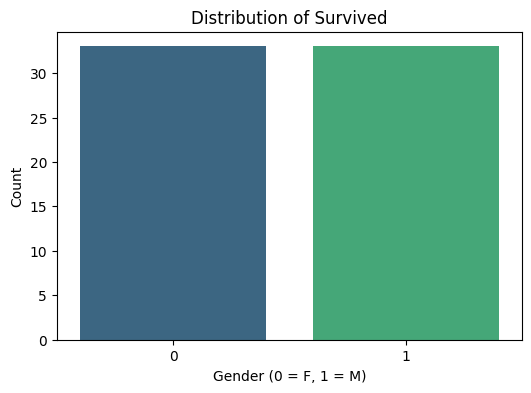

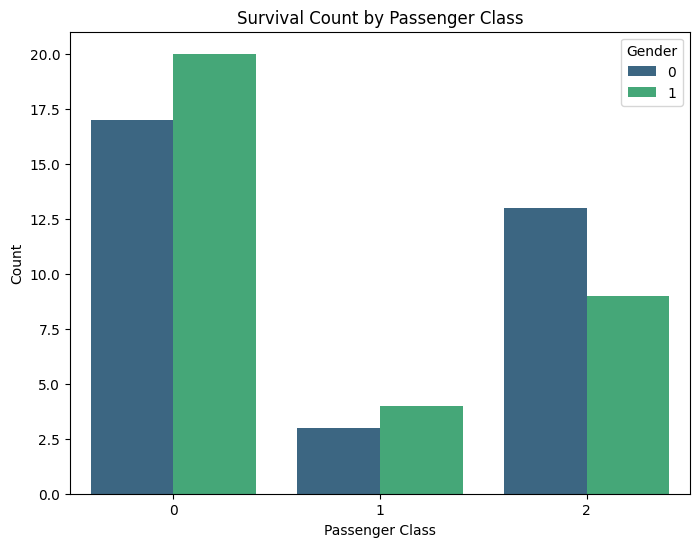

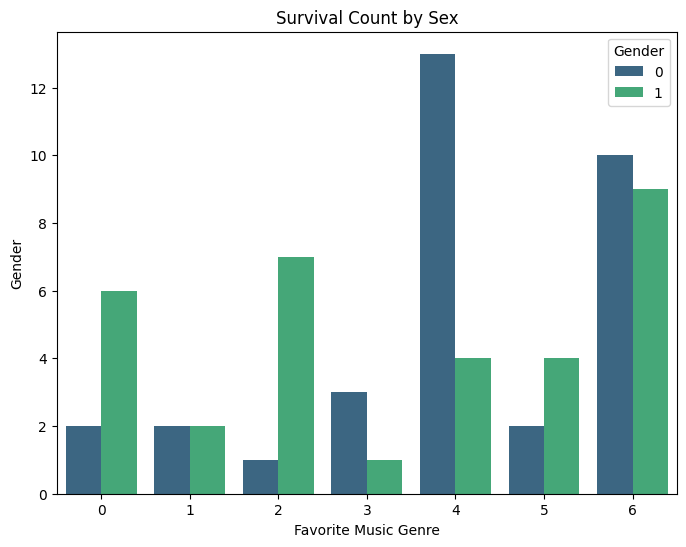

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 타겟 변수 분포
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Gender', palette='viridis')
plt.title('Distribution of Survived')
plt.xlabel('Gender (0 = F, 1 = M)')
plt.ylabel('Count')
plt.show()

# Pclass와 Survived 관계
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Favorite Color', hue='Gender', palette='viridis')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# Sex와 Survived 관계
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Favorite Music Genre', hue='Gender', palette='viridis')
plt.title('Survival Count by Sex')
plt.xlabel('Favorite Music Genre')
plt.ylabel('Gender')
plt.legend(title='Gender')
plt.show()

# Age와 Survived 관계
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Survived', y='Age', palette='viridis')
plt.title('Survival by Age')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()


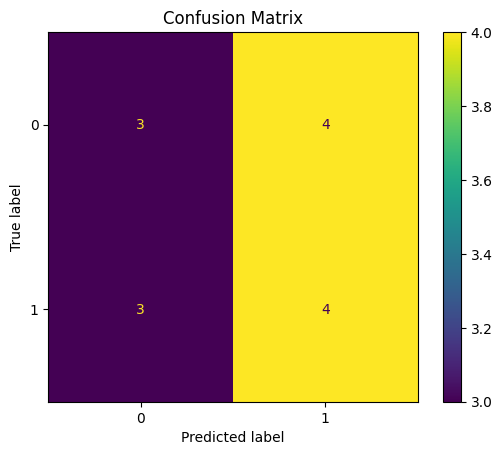

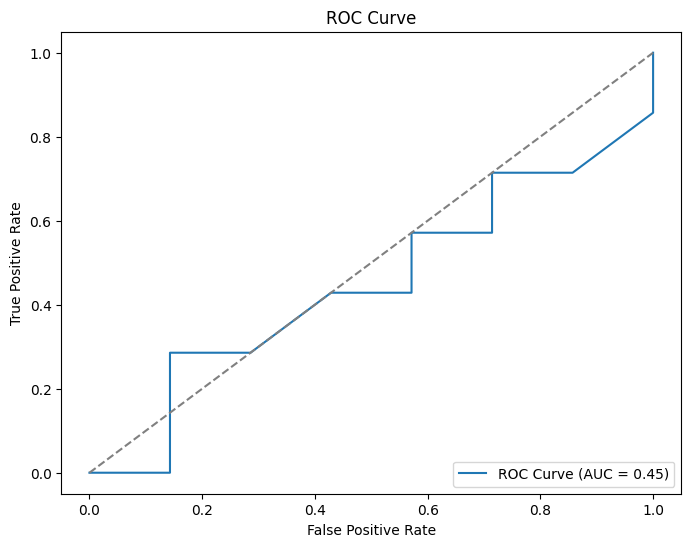

In [11]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

#Confusion Matrix
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()


#ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]  # 양성 클래스 확률
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()